In [31]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1

In [32]:
def _dist(p, q):
    # compute and return the euclidean distance
    # put your code here
    return np.linalg.norm(p - q)


In [33]:
def _eps_neighborhood(p, q, eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    return _dist(p, q) < eps


In [34]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    for i in range(n_points):
        if i != point_id and _eps_neighborhood(m[:, point_id], m[:, i], eps):
            seeds.append(i)
    return seeds


In [35]:
def expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    seeds = _region_query(m, point_id, eps)
    if len(seeds) >= min_points:
        for seed in seeds:
            classifications[seed] = cluster_id
        classifications[point_id] = cluster_id
        while len(seeds):
            cur = seeds[0]
            new_seeds = _region_query(m, cur, eps)
            if len(new_seeds) >= min_points:
                for i in range(len(new_seeds)):
                    new_point = new_seeds[i]
                    if classifications[new_point] == UNCLASSIFIED or classifications[new_point] == NOISE:
                        if classifications[new_point] == UNCLASSIFIED:
                            seeds.append(new_point)
                        classifications[new_point] = cluster_id
            seeds = seeds[1:]
        return True
    else:
        classifications[point_id] = NOISE
        return False


In [36]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure

    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster

    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here
    for point_id in range(n_points):
        if classifications[point_id] == UNCLASSIFIED:
            if expand_cluster(m, classifications, point_id, cluster_id, eps, min_points-1):
                cluster_id += 1
    return classifications


In [37]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()


In [38]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)


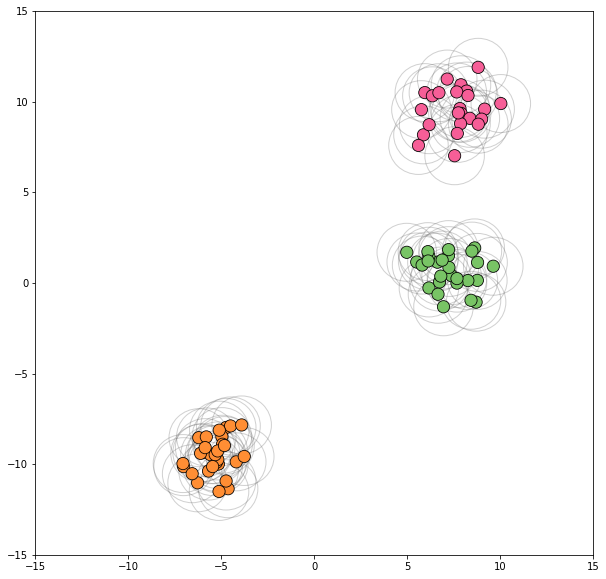

In [39]:
import dbscan_lab_helper as helper
%matplotlib inline

result = np.asarray(a)
helper.plot_clustered_dataset(
    dataset_1, result, neighborhood=True, epsilon=eps)


In [40]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()


In [41]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)


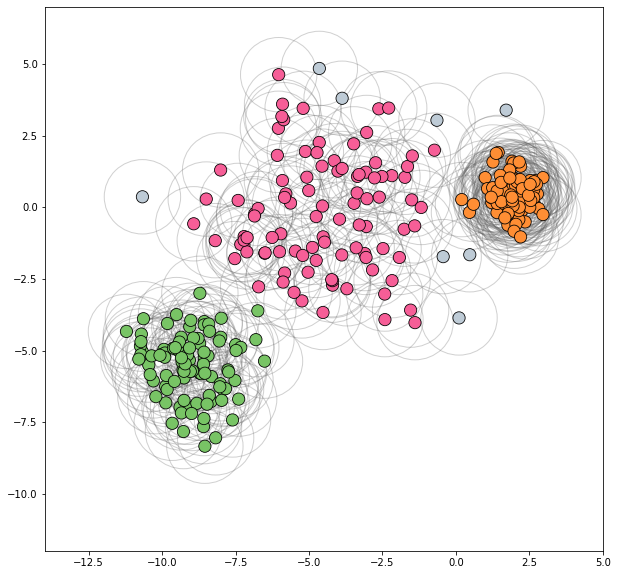

In [42]:
result = np.asarray(a)
helper.plot_clustered_dataset(
    dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
